In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from keras.models import Sequential
import numpy as np
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
import warnings
import seaborn as sns 
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('data.csv')
df = df.drop(['Unnamed: 0'], axis = 1)

In [8]:
df.head()

,Age,Spo2,HeartRate,BodyTemp,SystolicBP,DiastolicBP
0,25,95,86,98.0,130,80
1,35,95,70,98.0,140,90
2,29,95,80,100.0,90,70
3,30,95,70,98.0,140,85
4,35,98,76,98.0,120,60


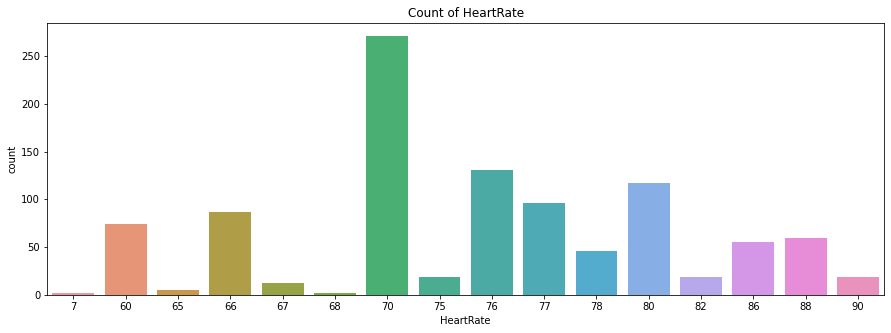

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'HeartRate', data = df)
plt.title('Count of HeartRate')
plt.show()

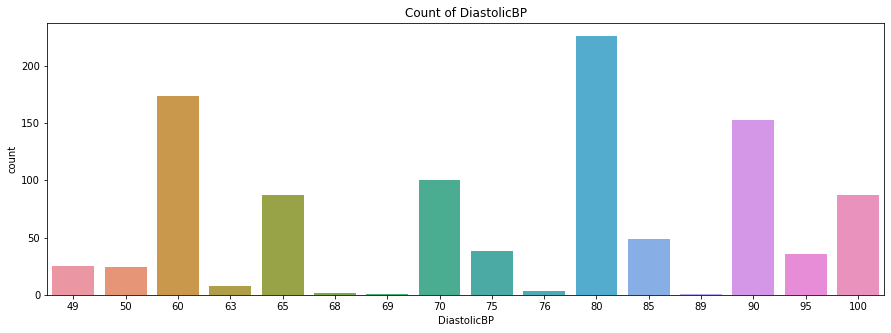

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'DiastolicBP', data = df)
plt.title('Count of DiastolicBP')
plt.show()

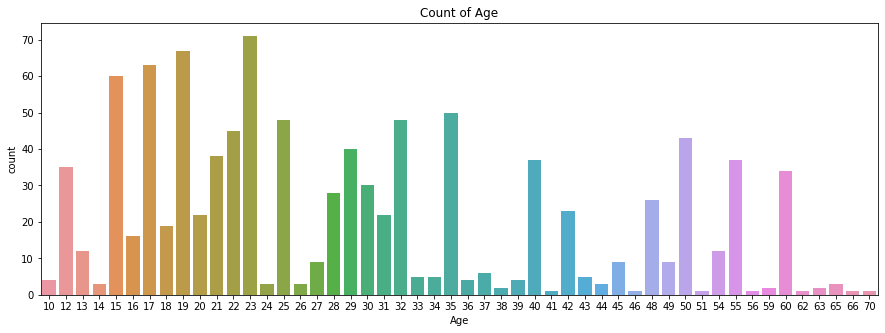

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Age', data = df)
plt.title('Count of Age')
plt.show()

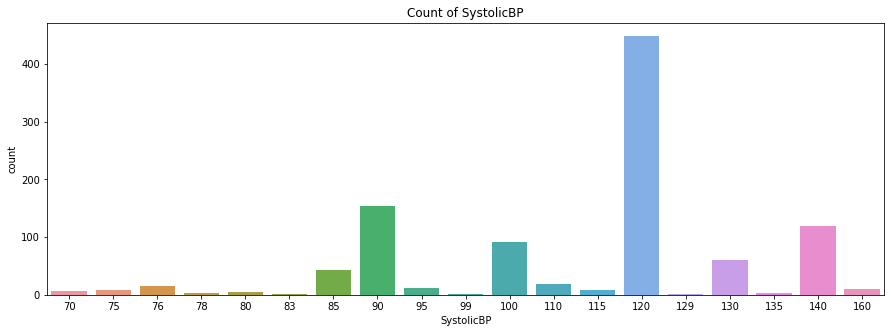

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'SystolicBP', data = df )
plt.title('Count of SystolicBP')
plt.show()

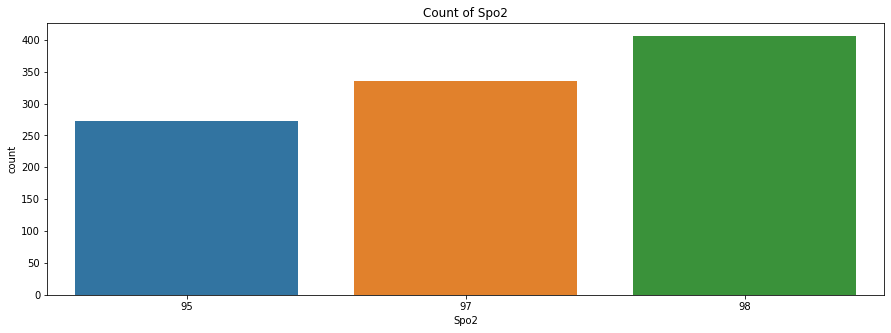

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Spo2', data = df )
plt.title('Count of Spo2')
plt.show()

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Spo2'}>],
       [<AxesSubplot: title={'center': 'HeartRate'}>,
        <AxesSubplot: title={'center': 'BodyTemp'}>],
       [<AxesSubplot: title={'center': 'SystolicBP'}>,
        <AxesSubplot: title={'center': 'DiastolicBP'}>]], dtype=object)

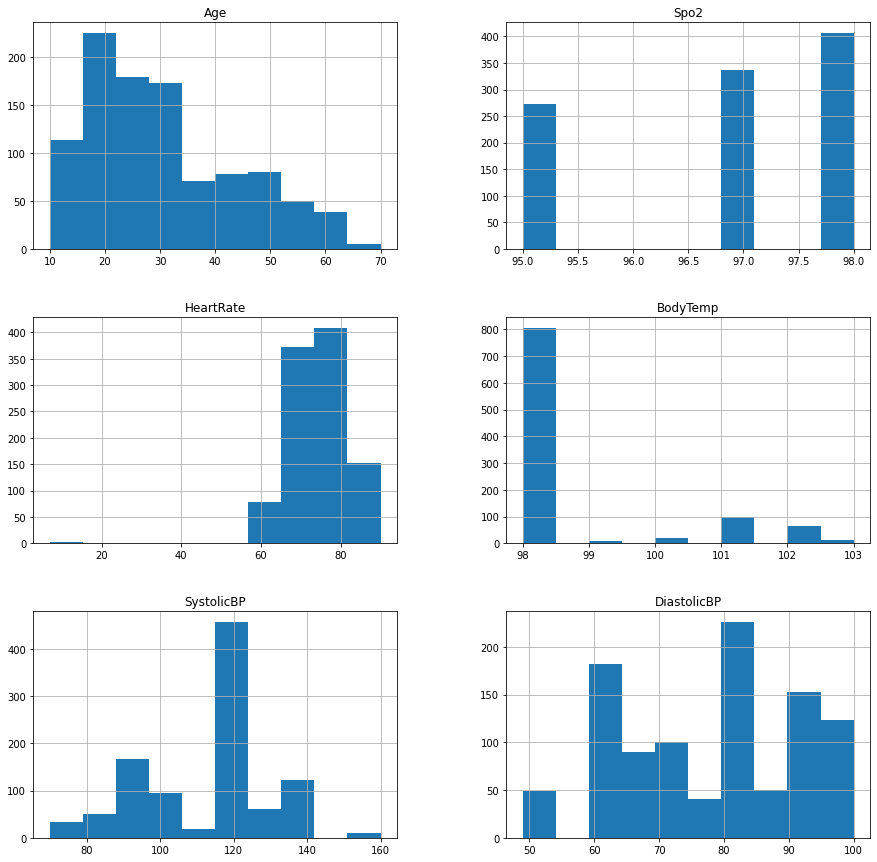

In [14]:
df.hist(figsize=(15,15))

<AxesSubplot: >

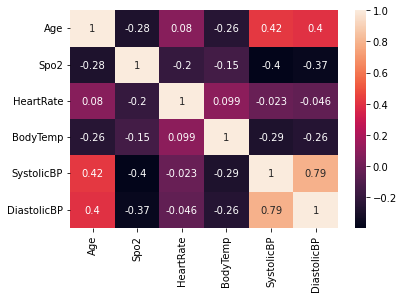

In [15]:
sns.heatmap(df.corr(), annot=True)

In [16]:
X = df.drop(['SystolicBP','DiastolicBP'],axis = 1)
y = df[['SystolicBP', 'DiastolicBP']]

In [17]:
X_columns = X.columns

In [18]:
#X = MinMaxScaler().fit_transform(X) #Normalization with MinMax

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
X_test

,Age,Spo2,HeartRate,BodyTemp
921,23,98,70,98.0
75,23,97,70,98.0
608,35,98,66,98.0
630,22,95,80,98.0
380,13,97,80,101.0
...,...,...,...,...
899,19,98,60,98.0
214,28,97,86,101.0
501,15,98,70,98.0
919,19,98,80,98.0


In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
print('R2 score is:',r2_score(y_test, y_pred))

R2 score is: 0.27673409865871956


In [24]:
print('MSE is:',mean_squared_error(y_test, y_pred))

MSE is: 197.31154640264748


In [25]:
from sklearn.linear_model import Ridge

In [26]:
regr = Ridge().fit(X_train, y_train)

In [27]:
pred = regr.predict(X_test)

In [28]:
print('R2 score is:',r2_score(y_test, pred))

R2 score is: 0.27670582555952905


In [29]:
print('MSE is:',mean_squared_error(y_test, pred))

MSE is: 197.3192801398867


In [30]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
pred1 = clf.predict(X_test)

In [32]:
X_test

,Age,Spo2,HeartRate,BodyTemp
921,23,98,70,98.0
75,23,97,70,98.0
608,35,98,66,98.0
630,22,95,80,98.0
380,13,97,80,101.0
...,...,...,...,...
899,19,98,60,98.0
214,28,97,86,101.0
501,15,98,70,98.0
919,19,98,80,98.0


In [33]:
pred1

array([[116.04420203,  81.00193443],
       [123.15854867,  78.69211955],
       [100.        ,  70.        ],
       [119.85595238,  63.65297619],
       [ 90.        ,  65.        ],
       [138.        ,  89.1       ],
       [115.82      ,  83.7       ],
       [137.52995005,  98.76497502],
       [ 99.91666667,  65.08333333],
       [ 90.3       ,  65.15      ],
       [ 77.86266808,  50.61669306],
       [120.        ,  80.        ],
       [120.        ,  89.40210572],
       [ 93.18809524,  62.27285714],
       [ 85.        ,  60.        ],
       [120.        ,  89.40210572],
       [ 97.19316017,  68.69658009],
       [137.52995005,  98.76497502],
       [137.52995005,  98.76497502],
       [120.        ,  80.        ],
       [114.53971584,  66.80957376],
       [101.4       ,  89.3       ],
       [119.75      ,  60.8       ],
       [138.8       ,  95.45      ],
       [119.8       ,  88.3       ],
       [123.15854867,  78.69211955],
       [129.95      ,  70.05      ],
 

In [34]:
print('R2 score is:',r2_score(y_test, pred1))

R2 score is: 0.8421237017376628


In [35]:
print('MSE is:',mean_squared_error(y_test, pred1))

MSE is: 46.58243808933521


In [36]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [37]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = clf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [38]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [39]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}  



In [40]:
clf_tuned = RandomForestRegressor(n_estimators = 20, min_samples_split= 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 70, bootstrap = False)

In [41]:
clf_tuned.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=70, max_features='sqrt',
                      n_estimators=20)

In [42]:
pred_tune = clf_tuned.predict(X_test)

In [43]:
importances = list(clf_tuned.feature_importances_)

feature_list = X_columns

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Age                  Importance: 0.48
Variable: HeartRate            Importance: 0.23
Variable: Spo2                 Importance: 0.16
Variable: BodyTemp             Importance: 0.13


In [44]:
print('R2 score is:',r2_score(y_test, pred_tune))

R2 score is: 0.842177817603381


In [45]:
print('MSE is:',mean_squared_error(y_test, pred_tune))

MSE is: 46.974577243264676


In [48]:
model1 = Sequential()
model1.add(Dense(128, activation="relu", input_shape=(4,)))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(2, activation="linear"))
model1.compile(loss="mse", optimizer="adam")
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               640       
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 9,026
Trainable params: 9,026
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = model1.fit(X_train, y_train, batch_size=32,epochs=200,validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
26/26 [==============================] - 1s 13ms/step - loss: 2206.0210 - val_loss: 413.8143
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 317.3025 - val_loss: 264.4810
Epoch 3/200
26/26 [==============================] - 0s 5ms/step - loss: 238.3086 - val_loss: 254.7018
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 236.0993 - val_loss: 253.9520
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 232.5734 - val_loss: 252.4665
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 230.0916 - val_loss: 250.4605
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 229.4077 - val_loss: 247.7803
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 229.8804 - val_loss: 253.4313
Epoch 9/200
26/26 [==============================] - 0s 4ms/step - loss: 226.0455 - val_loss: 246.7314
Epoch 10/200
26/26 [==============================] - 0s 5ms/step - los

Epoch 80/200
26/26 [==============================] - 0s 5ms/step - loss: 201.1441 - val_loss: 228.2454
Epoch 81/200
26/26 [==============================] - 0s 4ms/step - loss: 199.9811 - val_loss: 226.0798
Epoch 82/200
26/26 [==============================] - 0s 4ms/step - loss: 199.0298 - val_loss: 228.6860
Epoch 83/200
26/26 [==============================] - 0s 4ms/step - loss: 198.5364 - val_loss: 234.1501
Epoch 84/200
26/26 [==============================] - 0s 4ms/step - loss: 200.7803 - val_loss: 228.2962
Epoch 85/200
26/26 [==============================] - 0s 4ms/step - loss: 202.1883 - val_loss: 225.6777
Epoch 86/200
26/26 [==============================] - 0s 4ms/step - loss: 201.1711 - val_loss: 238.2270
Epoch 87/200
26/26 [==============================] - 0s 4ms/step - loss: 208.8148 - val_loss: 229.8227
Epoch 88/200
26/26 [==============================] - 0s 4ms/step - loss: 202.3666 - val_loss: 226.7627
Epoch 89/200
26/26 [==============================] - 0s 4ms/ste

26/26 [==============================] - 0s 4ms/step - loss: 195.7108 - val_loss: 221.1722
Epoch 159/200
26/26 [==============================] - 0s 3ms/step - loss: 195.3794 - val_loss: 225.7843
Epoch 160/200
26/26 [==============================] - 0s 4ms/step - loss: 198.2653 - val_loss: 226.1633
Epoch 161/200
26/26 [==============================] - 0s 4ms/step - loss: 197.3561 - val_loss: 226.6385
Epoch 162/200
26/26 [==============================] - 0s 3ms/step - loss: 194.9896 - val_loss: 227.7268
Epoch 163/200
26/26 [==============================] - 0s 4ms/step - loss: 196.7800 - val_loss: 225.5663
Epoch 164/200
26/26 [==============================] - 0s 4ms/step - loss: 195.5980 - val_loss: 221.9900
Epoch 165/200
26/26 [==============================] - 0s 4ms/step - loss: 193.5149 - val_loss: 226.5000
Epoch 166/200
26/26 [==============================] - 0s 5ms/step - loss: 196.3189 - val_loss: 235.9065
Epoch 167/200
26/26 [==============================] - 0s 4ms/step - 

<AxesSubplot: >

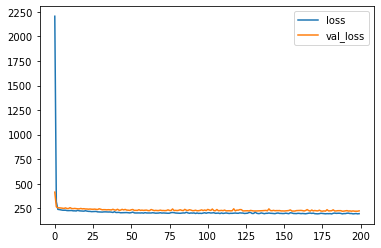

In [50]:
hist_data = pd.DataFrame(history.history)
hist_data[['loss', 'val_loss']].plot()

In [51]:
y_pred2 = model1.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [52]:
print('R2 score is:',r2_score(y_test, y_pred2))

R2 score is: 0.18315340691236737


In [53]:
print('MSE is:',mean_squared_error(y_test, y_pred2))

MSE is: 223.0638610631433


In [55]:
#X = X.to_numpy()
x = X.values.reshape(X.shape[0], X.shape[1], 1)
print(x.shape)

(1014, 4, 1)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [57]:
model2 = Sequential()
model2.add(Conv1D(32, 2, activation="relu", input_shape=(4, 1)))
model2.add(Flatten())
model2.add(Dense(64, activation="relu"))
model2.add(Dense(2, activation="linear"))
model2.compile(loss="mse", optimizer="adam")
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 32)             96        
                                                                 
 flatten (Flatten)           (None, 96)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                6208      
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                                                 
Total params: 6,434
Trainable params: 6,434
Non-trainable params: 0
_________________________________________________________________


In [58]:
history2 = model2.fit(X_train, y_train, batch_size=32,epochs=200, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
26/26 [==============================] - 1s 12ms/step - loss: 3717.9036 - val_loss: 656.8827
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 401.9906 - val_loss: 305.8148
Epoch 3/200
26/26 [==============================] - 0s 5ms/step - loss: 288.7327 - val_loss: 287.9639
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 276.2897 - val_loss: 281.8783
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 270.1065 - val_loss: 278.5762
Epoch 6/200
26/26 [==============================] - 0s 5ms/step - loss: 265.4615 - val_loss: 274.3934
Epoch 7/200
26/26 [==============================] - 0s 5ms/step - loss: 260.0097 - val_loss: 270.2764
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 255.6279 - val_loss: 266.5671
Epoch 9/200
26/26 [==============================] - 0s 4ms/step - loss: 251.8366 - val_loss: 263.8498
Epoch 10/200
26/26 [==============================] - 0s 4ms/step - los

Epoch 80/200
26/26 [==============================] - 0s 4ms/step - loss: 218.7524 - val_loss: 240.9696
Epoch 81/200
26/26 [==============================] - 0s 4ms/step - loss: 217.7898 - val_loss: 247.9410
Epoch 82/200
26/26 [==============================] - 0s 4ms/step - loss: 220.4228 - val_loss: 246.5293
Epoch 83/200
26/26 [==============================] - 0s 4ms/step - loss: 225.3810 - val_loss: 239.5792
Epoch 84/200
26/26 [==============================] - 0s 4ms/step - loss: 222.1717 - val_loss: 239.9392
Epoch 85/200
26/26 [==============================] - 0s 4ms/step - loss: 219.3850 - val_loss: 238.3700
Epoch 86/200
26/26 [==============================] - 0s 4ms/step - loss: 216.3025 - val_loss: 238.2567
Epoch 87/200
26/26 [==============================] - 0s 4ms/step - loss: 214.4636 - val_loss: 247.3623
Epoch 88/200
26/26 [==============================] - 0s 4ms/step - loss: 216.2584 - val_loss: 238.1529
Epoch 89/200
26/26 [==============================] - 0s 4ms/ste

26/26 [==============================] - 0s 4ms/step - loss: 203.4455 - val_loss: 226.2053
Epoch 159/200
26/26 [==============================] - 0s 4ms/step - loss: 199.7602 - val_loss: 227.3072
Epoch 160/200
26/26 [==============================] - 0s 5ms/step - loss: 200.9602 - val_loss: 227.0414
Epoch 161/200
26/26 [==============================] - 0s 5ms/step - loss: 199.3148 - val_loss: 225.8571
Epoch 162/200
26/26 [==============================] - 0s 4ms/step - loss: 202.4102 - val_loss: 229.0739
Epoch 163/200
26/26 [==============================] - 0s 4ms/step - loss: 201.6389 - val_loss: 228.3541
Epoch 164/200
26/26 [==============================] - 0s 4ms/step - loss: 200.2028 - val_loss: 226.3995
Epoch 165/200
26/26 [==============================] - 0s 5ms/step - loss: 203.3812 - val_loss: 226.6277
Epoch 166/200
26/26 [==============================] - 0s 5ms/step - loss: 199.4993 - val_loss: 228.4909
Epoch 167/200
26/26 [==============================] - 0s 6ms/step - 

<AxesSubplot: >

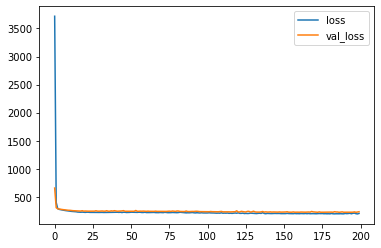

In [59]:
hist_data2 = pd.DataFrame(history2.history)
hist_data2[['loss', 'val_loss']].plot()

In [60]:
y_pred3 = model2.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [61]:
print('R2 score is:',r2_score(y_test, y_pred3))

R2 score is: 0.13968973719288824


In [62]:
print('MSE is:',mean_squared_error(y_test, y_pred3))

MSE is: 234.15637492601167


# Prediciton Function

In [172]:
data= int(input('Enter Age: '))
print("---------------------------------------------------------")
data1= int(input('Enter Spo2: '))
print("---------------------------------------------------------")
data2= int(input('Enter HeartRate: '))
print("---------------------------------------------------------")
data3= float(input('Enter BodyTemp: '))
print("---------------------------------------------------------")
data4= int(input('Enter BloodGlucose: '))
print("---------------------------------------------------------")

test = [data,data1,data2,data3,data4]
test = np.asarray(test)
test = test.reshape(1, -1)
prediction = clf_tuned.predict(test)

print('Your predicted SystolicBP is:' ,prediction[0][0])
print("---------------------------------------------------------")
print('Your predicted DiastolicBP is:' ,prediction[0][1])



Enter Age: 19
---------------------------------------------------------
Enter Spo2: 98
---------------------------------------------------------
Enter HeartRate: 60
---------------------------------------------------------
Enter BodyTemp: 98
---------------------------------------------------------
Enter BloodGlucose: 73
---------------------------------------------------------
Your predicted SystolicBP is: 120.0
---------------------------------------------------------
Your predicted DiastolicBP is: 85.0
